<a href="https://colab.research.google.com/github/nikunjsonule/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing data and show first 5 rows
health_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/current project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
health_data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [4]:
# Columns in the datasets
health_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
#Find out the data type of each column 
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
health_data.shape

(381109, 12)

In [7]:
print(health_data.isna().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


So their are no null values.

In [8]:
#Statistical Summary of numeric Variables
health_data.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [9]:
health_data.describe(include = object)

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [10]:
 #get all categorical columns in the dataframe
health_data.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [11]:
 # get all numerical columns in the dataframe
health_data.select_dtypes(exclude=['object']).columns.tolist()

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [12]:
health_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

* As we can see, our data set contains 381109 rows and 12 columns.
* We do not have any Null Values in our dataset.
* Our dependent feature is a categorical column (Response)

In [13]:
# checking the duplicate values in our data
health_data.duplicated().value_counts()

False    381109
dtype: int64

# Let's do some Data Visualizations

## Target Variable (Response)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


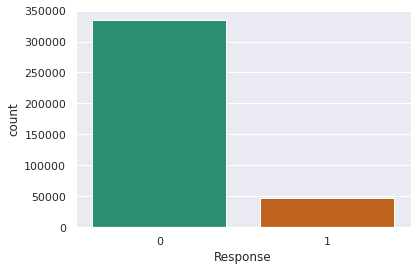

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(health_data['Response'],data= health_data,palette="Dark2")

The data is highly imbalanced. Response :	1 : Customer is interested, 0 : Customer is not interested

## Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


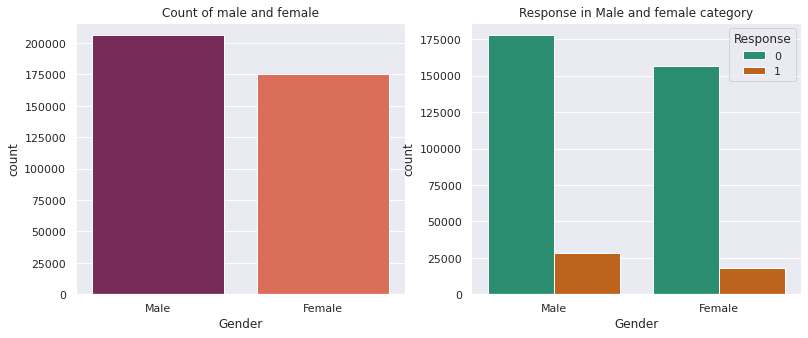

In [15]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(health_data['Gender'],palette='rocket')
plt.title("Count of male and female")

plt.subplot(1,2,2)
sns.countplot(health_data['Gender'], hue = health_data['Response'],palette="Dark2")
plt.title("Response in Male and female category")
plt.show()

* The gender variable in the dataset is slightly equally distributed.
* Male category is slightly greater than that of female and chances of getting the insurance is also little high.

## Age Vs Response

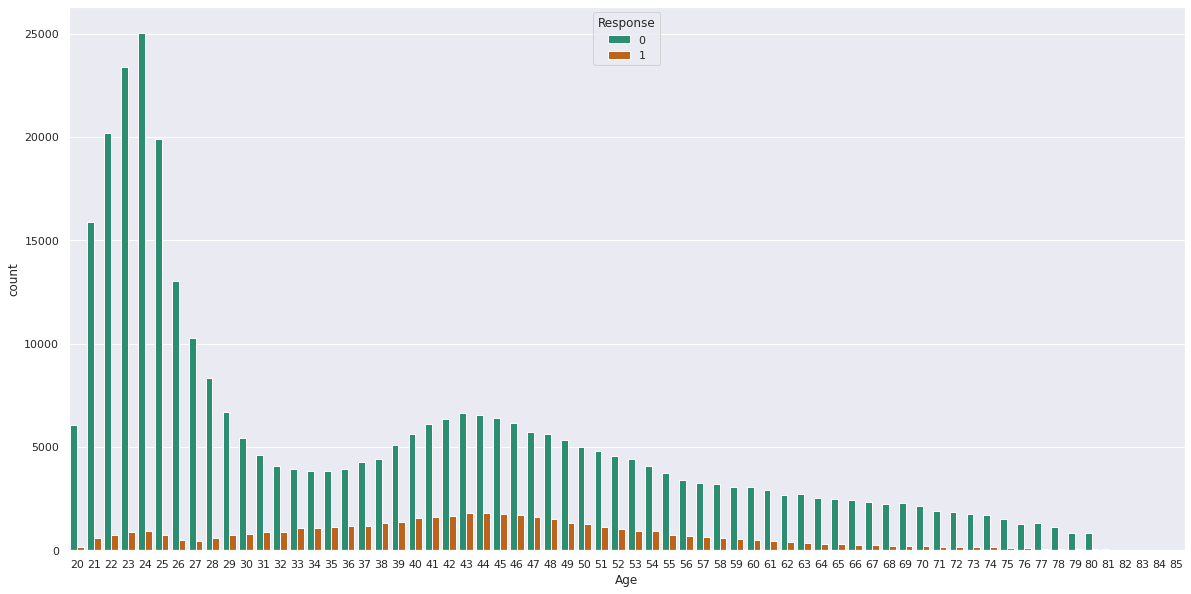

In [16]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data= health_data,palette="Dark2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


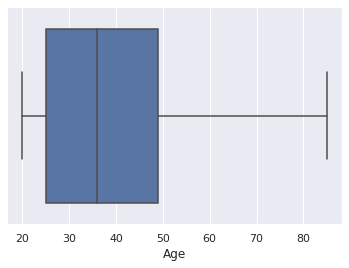

In [17]:
sns.boxplot(health_data['Age'])

* Young people below 30 are not interested in vehicle insurance. 
* People aged between 28-65 are more likely to be interested but overall their are people were Age matters they deserve the insurance.
* From the boxplot we can see that there no outlier in the data.

## Driving License

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


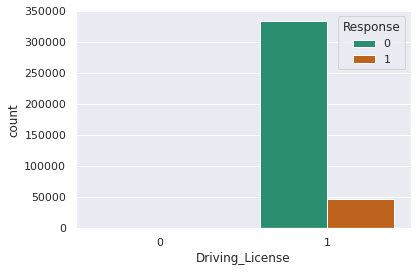

In [18]:
sns.countplot(health_data['Driving_License'],hue=health_data['Response'],palette="Dark2")

* Customers are having Driving_License more those who are not interseted in insurance as compared to customers who are intrested in Insurance are less.
*  In simple it means in our dataset people who are intrested in Insurance are less.

## Previously_Insured Vs Response

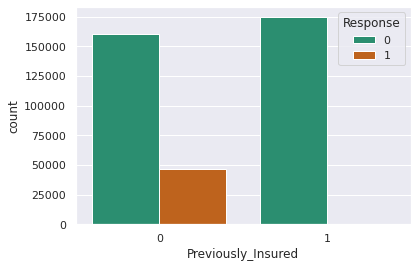

In [19]:
sns.countplot(x='Previously_Insured',hue='Response',data=health_data,palette='Dark2')

Customer who are not perviously insured are likely to be intrested in Insurance.

## Vehicle_Age Vs Response

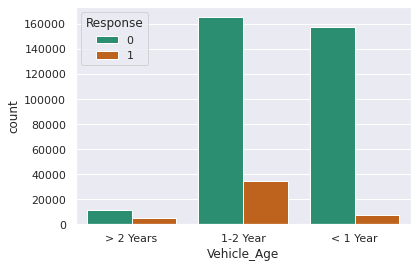

In [20]:
sns.countplot(x='Vehicle_Age',hue='Response',data=health_data,palette='Dark2')

In [21]:
a = health_data['Vehicle_Age'].unique()

In [22]:
print(a)

['> 2 Years' '1-2 Year' '< 1 Year']


Customers with vechicle age 1-2 years are more likely to interested as compared to the others.

Customers with with Vehicle_Age >2 years have very less chance of getting insurance but Vehicle_Age < 1 year is also less likely to get insurance.

## Annual Premium

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


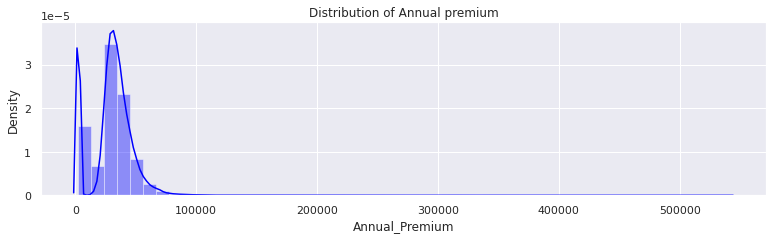

In [23]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(health_data['Annual_Premium'], color='blue')
plt.title("Distribution of Annual premium")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


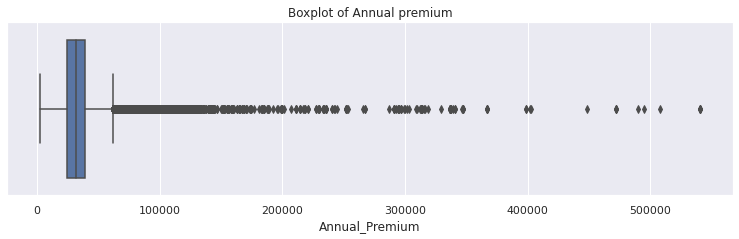

In [24]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(health_data['Annual_Premium'])
plt.title("Boxplot of Annual premium")
plt.show()

* From the distribution plot we can infer that the annual premium variable is right skewed
* From the boxplot we can observe lot of outliers in the variable.

## Heatmap to find correlation between variables

Text(0.5, 1.05, 'Correlation of Features')

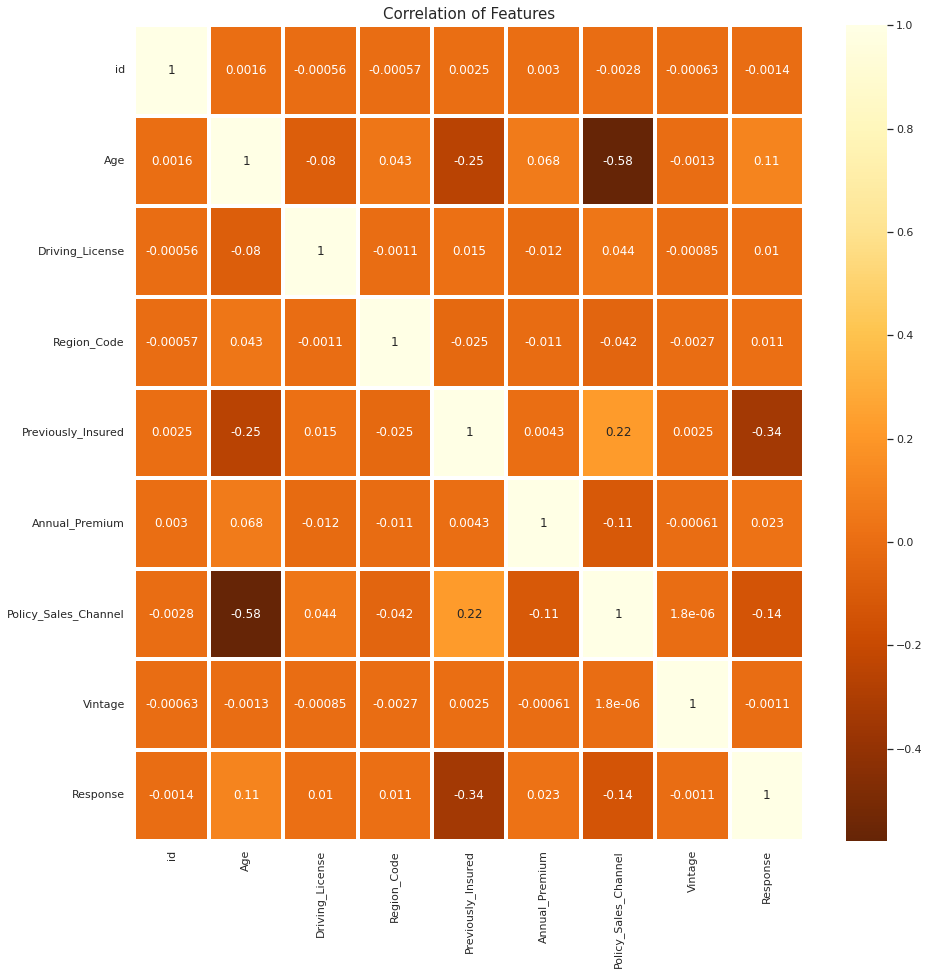

In [25]:
corr = health_data.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlOrBr_r')
plt.title("Correlation of Features", y=1.05, size=15)

Well if we see the relation between Age and Policy_Sales_Channel, can observe negative correlation with -0.58. As in most of the feature we have is medium range of correaltion (i.e not too positive and not too negative).

# Data Cleaning

Let's do some outlier detection in our dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

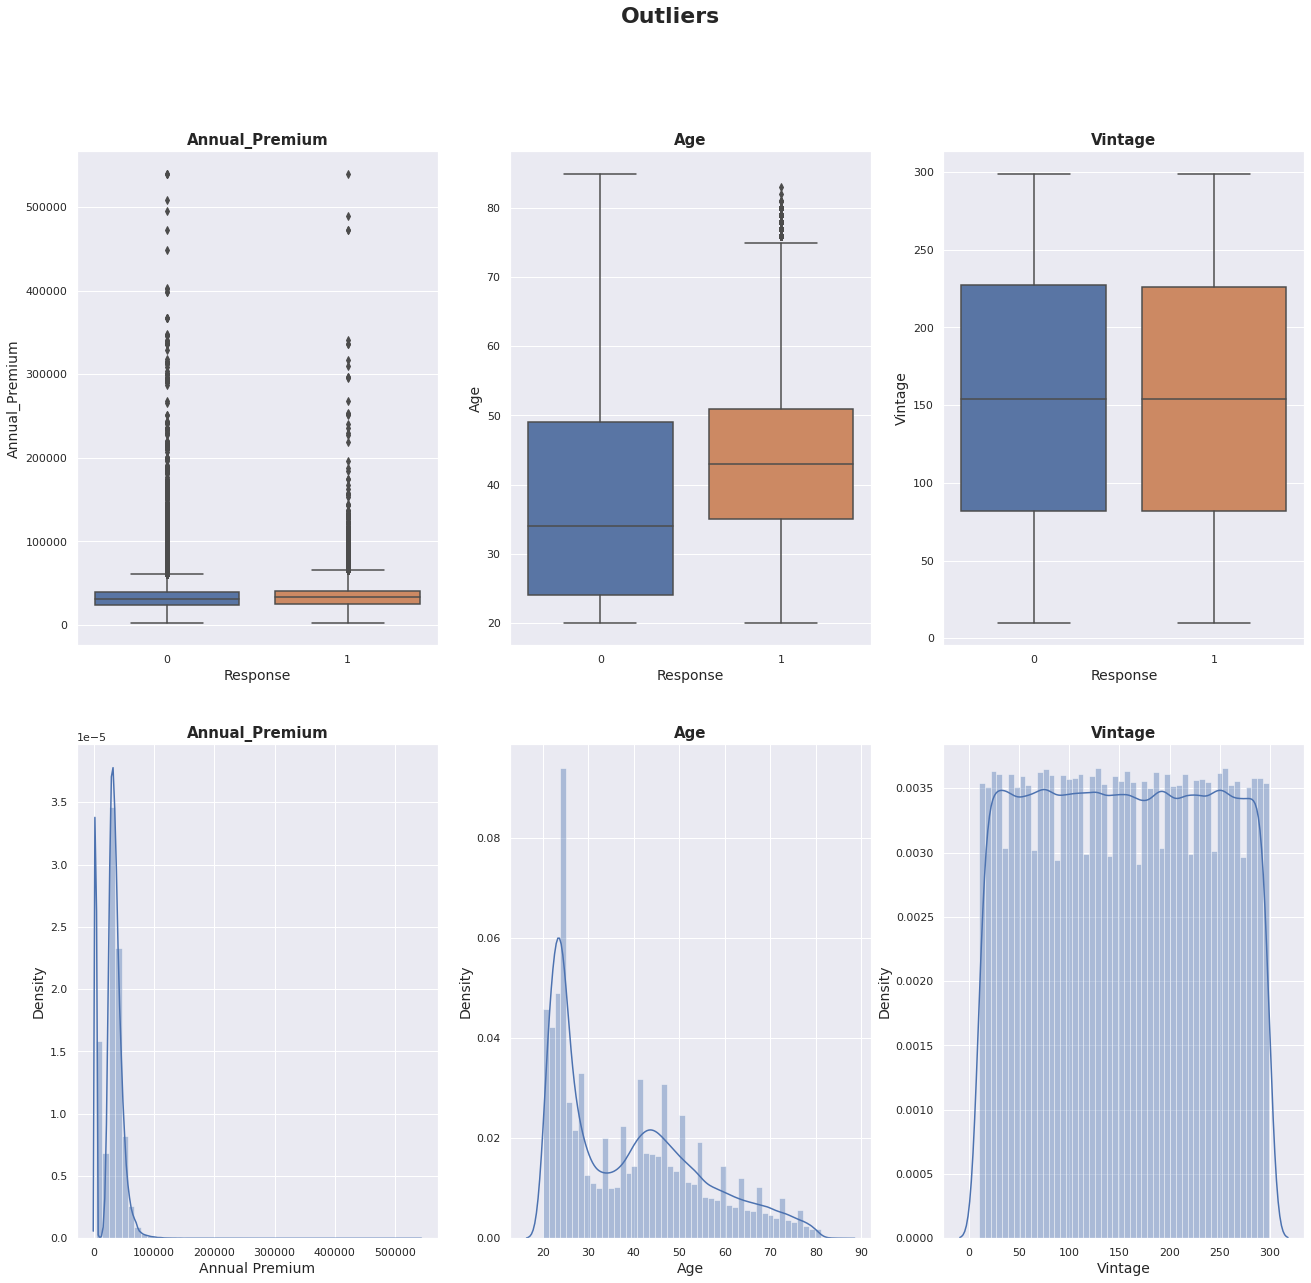

In [26]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,20))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(health_data)

* From the above plot it can be implied that Annual Premium has a poitively skewed distribution.
* As we can also depict that Vintage has a approximatly uniform distribution making it stable.
* Age columns has some outliers but we are not going to treat them because it won't be affecting our result.

## Outlier and feature scaling

For Outlier treatment we will be applying quantile method. For feature Scaling we will be using MinMaxScaler technique for Normlization

In [27]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(health_data)
scale_features(health_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


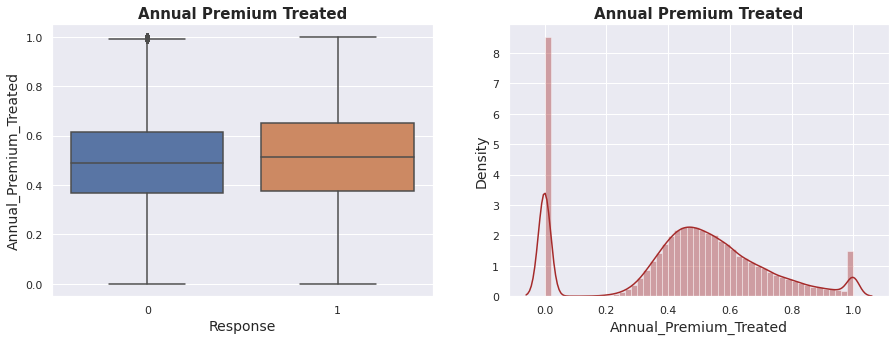

In [28]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(health_data)

Insights :-   
There are no more outliers in Annual_Premium.

## Let's do Exploratory Data Analysis

In [58]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = health_data['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )

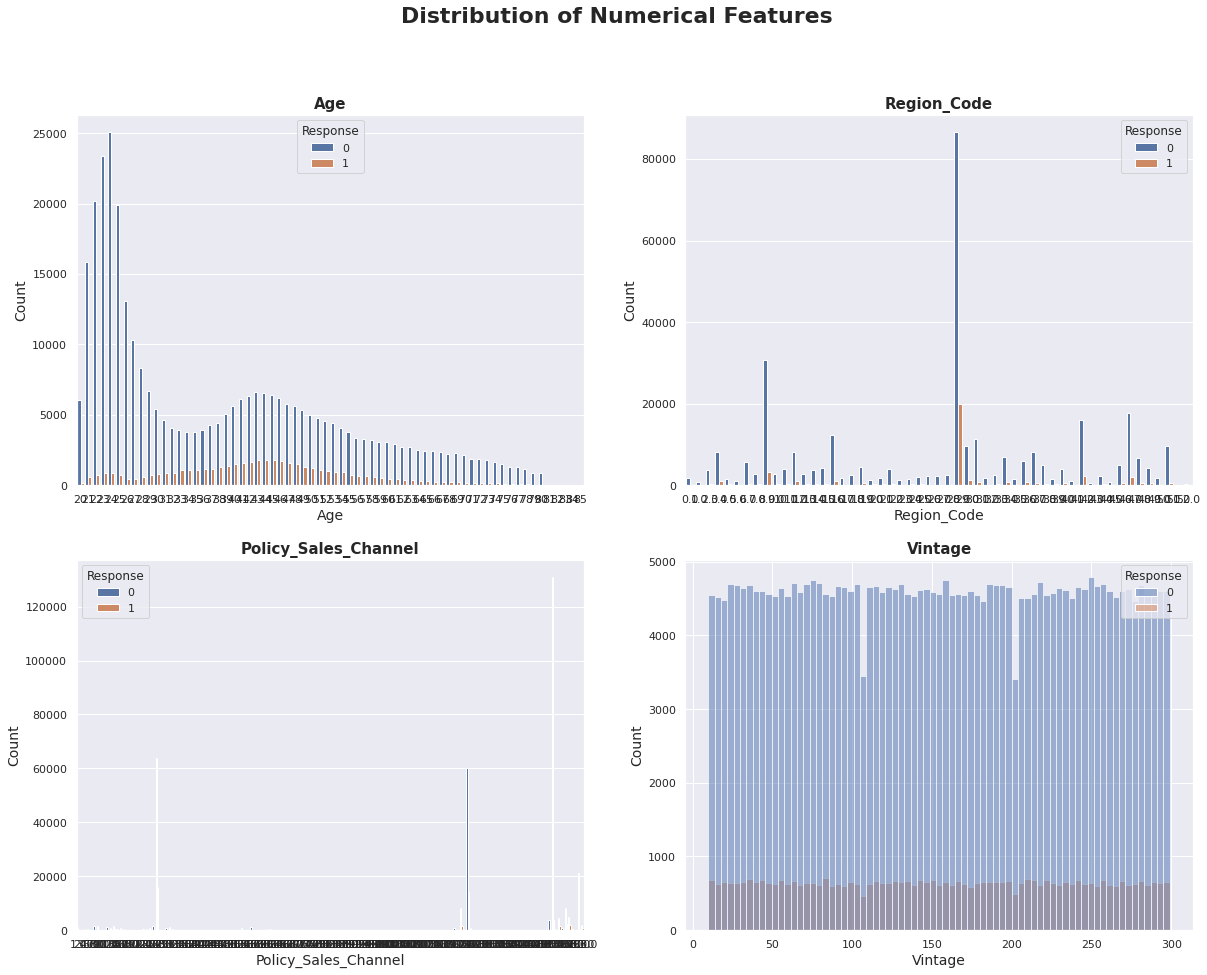

In [59]:
show_distribution_numerical_features(health_data)

Insights:-    
*  As per above in Reponse customer who are eligeble for Insurance, Age is varying from 21 - 65.
*  According to region code most of region they don't prefer but some of the region code they have slighlty high too.
*  Policy Sales Channel doesn't affect at all at Insurance claiming. 
* Vinatge has balanced with 
(Response : 1 : Customer is interested, 0 : Customer is not interested) but quite less for those Customer who are intersted.

## Converting numeical feature like Age, Policy Channel and Region Code to categorical feature.

In [60]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
    res = dict(zip(x.keys(),x.values))
    df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res) 

    # Categorizing Region Code feature
    x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(health_data)

In [61]:
def show_distribution_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

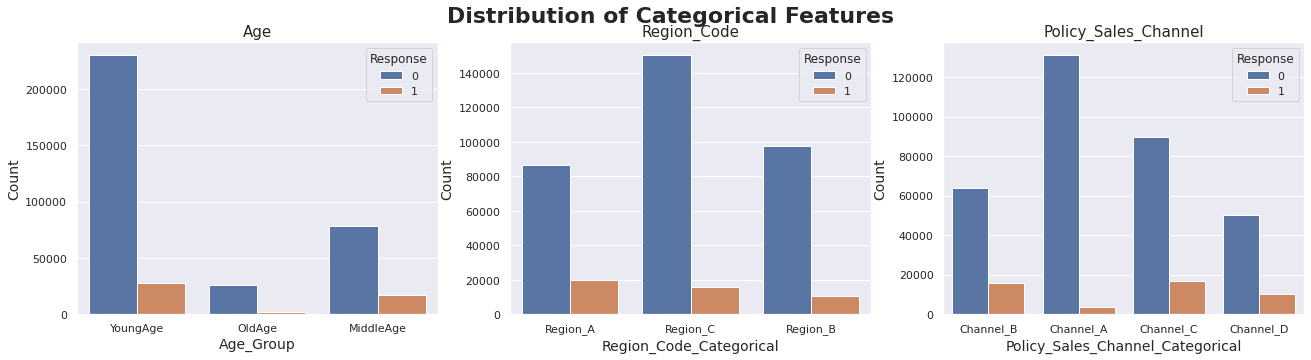

In [62]:
show_distribution_num_to_cat(health_data)

* As in Age YoungAge - 25 to 45, MiddleAge - 45 to 65 and OldAge - More than 65.
* We can see that Customers belonging to YoungAge group are more likely not interested in taking the vehicle insurance but some are.
* Similarly, Region_C in Region Code has the highest chances of not taking insurance but in Region_A most of them prefer as compared to other who wants Insurance.
* Channel_A Customers has the highest chances of not taking the insurance but Channel_C customers wants to claim Insurance as compared to others.

In [64]:
health_data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  Annual_Premium_Treated  Vintage_Treated  Age_Group  \
0         1                0.638245         0.716263   YoungAge   
1         0                0.521510         0.598616     OldAge   
2         1                0.601797         0.058824  MiddleAge   
3         0                0.438540         0.667820   YoungAge   
4         0                0.419591         0.100346   YoungAge   

  Policy_Sales_Channel_Categorical Region_Code_Categorical  
0                        Channel_B                Region_A  
1                        Channel_B                Region_C  
2                        Channel_B                Region_A  
3                        Channel_A                Region_C  
4                        Channel_A                Region_B

## Let's see to Gender Distribution

In [66]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="Dark2",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

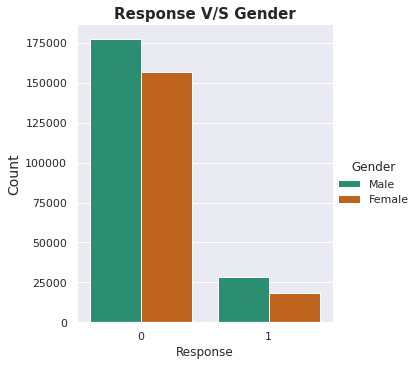

In [67]:
show_gender_response_relation(health_data)

Insights:-   
*  For the above plot, we can say that the no. of male customers in our data set is higher than female customers.

*  More Male customers are likely to take Insurance.

## Let's see more in Age feature

In [74]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="Dark2",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group", 
                 hue="Previously_Insured", data=df, palette="Dark2",
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",palette="Dark2",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

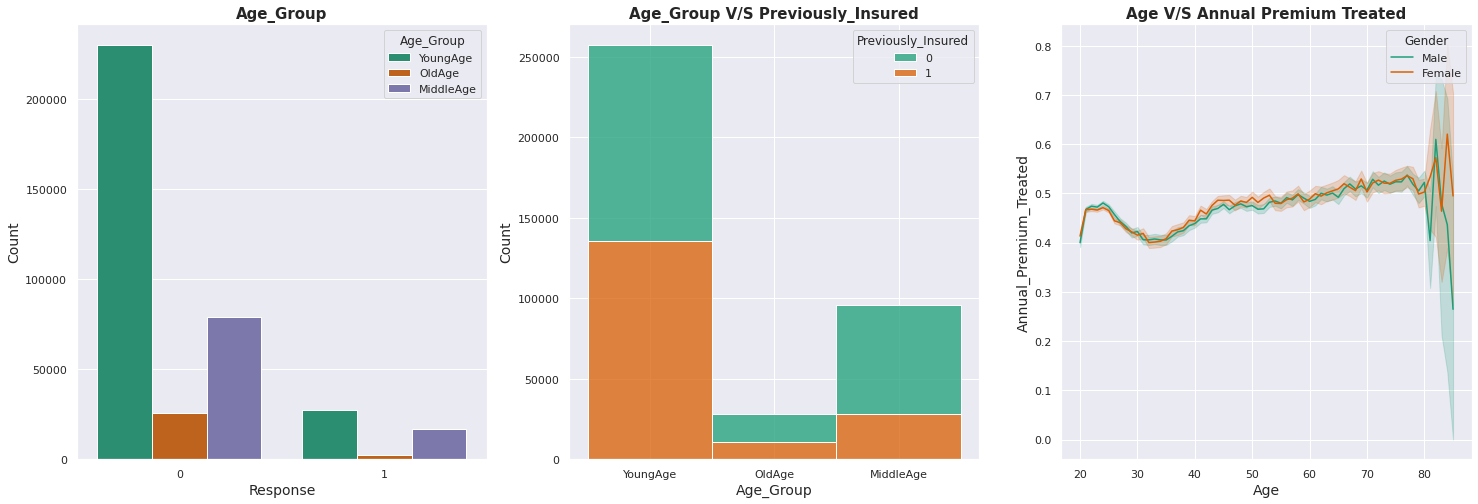

In [75]:
show_age_relations(health_data)

Insights:-   
- From the first plot, we can see the Response received from the different Age_Group (As in Age YoungAge - 25 to 45, MiddleAge - 45 to 65 and OldAge - More than 65). 
* YoungAge Customer prefer more as compared to OldAge and MiddleAge. 
* MiddleAge are also more comparetively more to get likely for Insurance.
* Second plot shows the number of customers of different age group having or not having Insurance. Similarly, here we observe more in YoungAge and MiddleAge.
* We can say that the customers of YoungAge and OldAge are equally likely to have/not have vehicle insurance whereas customers of MiddleAge has the highest chances of not having a previously insured vehicle insurance.
* From the third plot, we can see the relation between Age and their Annual Premium for both Male and Female customers. 
* The variation is very precise that as the Age increase the Annual Premium also increases as per year.

## Vehicle Damage

In [76]:
def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution')
    fig.show()

In [77]:
vehicle_damage_distribution(health_data)

Insights:-   
The above estimation is clear - 97.9% the vehicle is not damage while 2.1% we can see the cutomers vehicle is been damage.

In [80]:
def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", aspect=.7,
            kind="point", data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df, kind = 'point')
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

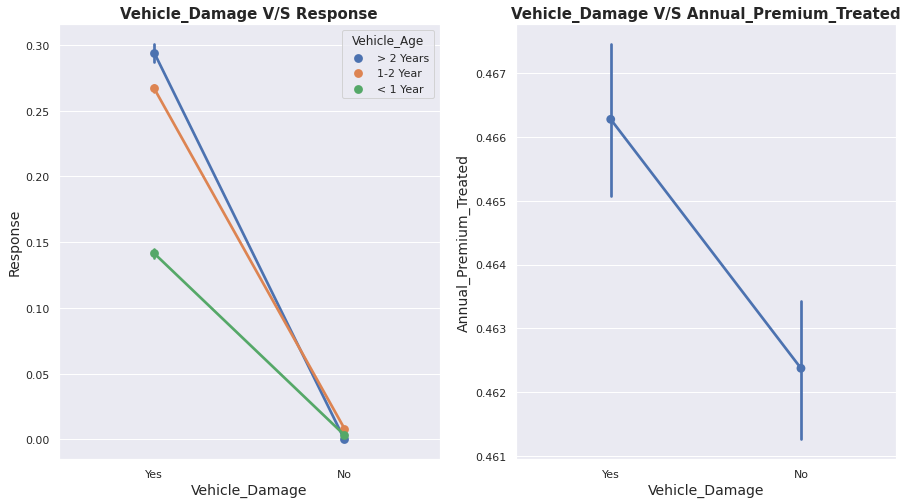

In [81]:
show_vechile_damage_relations(health_data)

Insights:-

* From the first point plot, we can say that the chances of taking a vehicle insurance is higher if vehicle is damaged irrespective of VehicleAge group. With the increase in vehicle age, the chances of taking vehicle insurance also increases.
* The second point plot shows that the Annual Premium is comparetively higher for customers with damaged vehicle.